In [1]:
from google_play_scraper import Sort, reviews_all, reviews, app
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Function to fetch data from google play store

In [2]:
def fetch_data(id):
    result = app(id, lang='en', country='us')
    return result

#### Assigning value to Variables Note: This returns a dictionary

In [3]:
w3School = fetch_data('com.codes.school')
udemy = fetch_data('com.udemy.android')
soloLearn = fetch_data('com.sololearn')
grassHopper = fetch_data('com.area120.grasshopper')
programmingHub = fetch_data('com.freeit.java')
programmingHero = fetch_data('com.learnprogramming.codecamp')
encode = fetch_data('com.upskew.encode')
coursera = fetch_data('org.coursera.android')

#### Creating list of index

In [4]:
# indexs = ['installs', 'score', 'ratings', 'reviews', 'currency', 'genre']
indexs = ['W3School', 'Udemy', 'soloLearn', 'grassHopper', 'programmingHub', 'programmingHero', 'encode', 'coursera']

#### Creating a function to remove '+' and ',' sign from the install values

In [5]:
# Removing '+' from the install values
def remove(str):
    num = str.replace('+', '')
    return int(num.replace(',', ''))

#### Collecting important details from the dictionary which was returned above

In [6]:
install = {'Install':[w3School['installs'], udemy['installs'], soloLearn['installs'], grassHopper['installs'], programmingHub['installs'], programmingHero['installs'], encode['installs'], coursera['installs']]}

In [7]:
score = {'Score':[w3School['score'], udemy['score'], soloLearn['score'], grassHopper['score'], programmingHub['score'], programmingHero['score'], encode['score'], coursera['score']]}

In [8]:
ratings = {'Ratings':[w3School['ratings'], udemy['ratings'], soloLearn['ratings'], grassHopper['ratings'], programmingHub['ratings'], programmingHero['ratings'], encode['ratings'], coursera['ratings']]}

In [9]:
reviews = {'Reviews':[w3School['reviews'], udemy['reviews'], soloLearn['reviews'], grassHopper['reviews'], programmingHub['reviews'], programmingHero['reviews'], encode['reviews'], coursera['reviews']]}

In [10]:
currency = {'Currency':[w3School['currency'], udemy['currency'], soloLearn['currency'], grassHopper['currency'], programmingHub['currency'], programmingHero['currency'], encode['currency'], coursera['currency']]}

In [11]:
genre = {'Genre':[w3School['genre'], udemy['genre'], soloLearn['genre'], grassHopper['genre'], programmingHub['genre'], programmingHero['genre'], encode['genre'], coursera['genre']]}

#### Changing each of the dictionary to Pandas DataFrame

In [12]:
install = pd.DataFrame(install, index= indexs)
score = pd.DataFrame(score, index= indexs)
ratings = pd.DataFrame(ratings, index= indexs)
reviews = pd.DataFrame(reviews, index= indexs)
currency = pd.DataFrame(currency, index= indexs)
genre = pd.DataFrame(genre, index= indexs)
apps = pd.DataFrame(indexs, index=indexs, columns=['Apps']) # Creating Apps column

In [13]:
install = install['Install'].apply(remove) # This returns a Pandas Series

In [14]:
install = pd.DataFrame(install, index= indexs) # Changing install back to Pandas DataFrame

In [15]:
data = install.join(score)
data = data.join(ratings)
data = data.join(reviews)
data = data.join(currency)
data = data.join(genre)
data = data.join(apps)

In [16]:
data

,Install,Score,Ratings,Reviews,Currency,Genre,Apps
W3School,50000,0.000000,0,0,USD,Education,W3School
Udemy,10000000,4.363345,363227,13211,USD,Education,Udemy
soloLearn,10000000,4.510539,559293,19351,USD,Education,soloLearn
grassHopper,5000000,4.461538,60748,4763,USD,Education,grassHopper
programmingHub,5000000,4.712062,165182,6542,USD,Education,programmingHub
programmingHero,1000000,4.738602,39603,1441,USD,Education,programmingHero
encode,500000,4.486667,5796,697,USD,Education,encode
coursera,10000000,4.129464,132376,3812,USD,Education,coursera


# Visualization

<AxesSubplot:xlabel='Install', ylabel='Apps'>

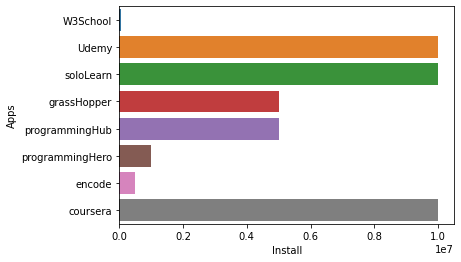

In [17]:
sns.barplot(x='Install', y='Apps', data=data)

<AxesSubplot:xlabel='Score', ylabel='Apps'>

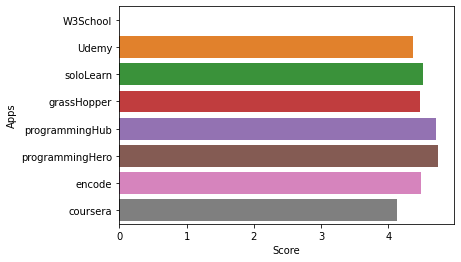

In [18]:
sns.barplot(x='Score', y='Apps', data=data)

<AxesSubplot:xlabel='Ratings', ylabel='Apps'>

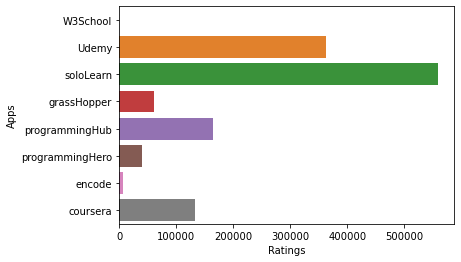

In [19]:
sns.barplot(x='Ratings', y='Apps', data=data)

<AxesSubplot:xlabel='Reviews', ylabel='Apps'>

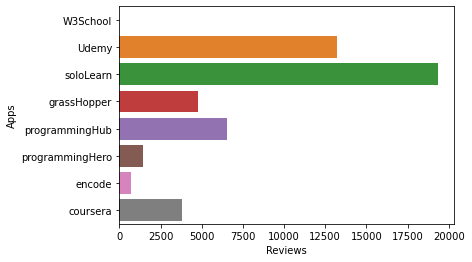

In [20]:
sns.barplot(x='Reviews', y='Apps', data=data)

#### From our Data Visualization above we saw that SoloLearn was the best app in terms of everything

#### Sentiment Analysis base on SoloLearn 